In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [64]:
train_data = pd.read_csv("Train_Data.csv")
train_data.head(100)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FIN1000096,226001,4/17/2007,261001.0,F,7/8/1964,M,Others,Graduate,9/5/2006,...,Confirmation,M,12/16/1960,0.0,1.0,57320.0,4.0,57320.0,4.0,0
96,FIN1000097,284001,4/17/2007,284202.0,M,7/3/1987,S,Others,Class X,5/8/2006,...,Confirmation,M,8/23/1967,1.0,1.0,171830.0,16.0,171830.0,16.0,0
97,FIN1000098,226001,4/17/2007,261001.0,M,5/20/1978,M,Business,Graduate,5/25/2006,...,Confirmation,M,11/7/1979,0.0,0.0,41810.0,4.0,41810.0,4.0,0
98,FIN1000099,226001,4/17/2007,226001.0,F,8/17/1982,S,Business,Class XII,11/15/2006,...,Confirmation,M,7/8/1977,0.0,1.0,115986.0,8.0,115986.0,8.0,0


In [65]:
test_data = pd.read_csv("Test_Data.csv")
test_data.head(100)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FIN1009623,422005,7/7/2008,422402.0,M,1/17/1979,M,Salaried,Graduate,11/30/2007,...,3.0,Confirmation,M,8/19/1975,4.0,3.0,1370358.0,6.0,1370358.0,6.0
96,FIN1009624,201301,7/7/2008,201012.0,F,7/22/1973,M,Others,Graduate,5/5/2008,...,4.0,Probation,M,6/25/1973,3.0,1.0,19230.0,1.0,19230.0,1.0
97,FIN1009625,121002,7/7/2008,121004.0,M,5/17/1967,M,Salaried,Graduate,4/28/2008,...,4.0,Probation,M,2/23/1972,5.0,0.0,0.0,0.0,0.0,0.0
98,FIN1009626,284001,7/7/2008,284003.0,M,3/27/1978,S,Salaried,Graduate,5/12/2008,...,4.0,Probation,M,3/25/1978,3.0,2.0,0.0,0.0,0.0,0.0


In [66]:
train_data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [67]:
train_data['Applicant_Gender'].value_counts()

M    7179
F    2281
Name: Applicant_Gender, dtype: int64

In [68]:
#Convert Applicant Gender
dict_gender = {'M': 1, 'F':0}
train_data.replace({'Applicant_Gender': dict_gender}, inplace = True)

train_data['Applicant_Gender'] = train_data['Applicant_Gender'].fillna(-1)

In [69]:
test_data.replace({'Applicant_Gender': dict_gender}, inplace = True)

test_data['Applicant_Gender'] = test_data['Applicant_Gender'].fillna(-1)

In [70]:
train_data['Applicant_Marital_Status'].value_counts()

M    6177
S    3267
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

In [71]:
test_data['Applicant_Marital_Status'].value_counts()

M    4089
S     907
W      12
D       7
Name: Applicant_Marital_Status, dtype: int64

In [72]:
train_data['Applicant_Marital_Status'] = train_data['Applicant_Marital_Status'].fillna('M')

In [73]:
train_data['Applicant_Occupation'].value_counts()

Salaried         3787
Business         2303
Others           1966
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64

In [74]:
test_data['Applicant_Occupation'].value_counts()

Salaried         2560
Business          646
Others            506
Self Employed     310
Student            19
Name: Applicant_Occupation, dtype: int64

In [75]:
#Convert Applicant Occupation
dict_occupation = {'Salaried': 5, 'Business':4, 'Others':3, 'Self Employed':2, 'Student':1}
train_data.replace({'Applicant_Occupation': dict_occupation}, inplace = True)

train_data['Applicant_Occupation'] = train_data['Applicant_Occupation'].fillna(0)

In [76]:
test_data.replace({'Applicant_Occupation': dict_occupation}, inplace = True)

test_data['Applicant_Occupation'] = test_data['Applicant_Occupation'].fillna(0)

In [77]:
test_data['Applicant_Qualification'].value_counts()

Graduate                                                                              3375
Class XII                                                                             1357
Others                                                                                 171
Masters of Business Administration                                                      71
Class X                                                                                 19
Professional Qualification in Marketing                                                  5
Associate / Fellow of Institute of Chartered Accountans of India                         2
Associate/Fellow of Institute of Institute of Costs and Works Accountants of India       1
Name: Applicant_Qualification, dtype: int64

In [78]:
train_data['Applicant_Qualification'].value_counts()

Class XII                                                           5806
Graduate                                                            3196
Class X                                                              225
Others                                                               132
Masters of Business Administration                                    74
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Institute of Company Secretories of India          1
Associate/Fellow of Acturial Society of India                          1
Professional Qualification in Marketing                                1
Certified Associateship of Indian Institute of Bankers                 1
Name: Applicant_Qualification, dtype: int64

In [79]:
#Convert Applicant Qualification
dict_qualification = {'Class XII': 1, 'Graduate':2, 'Class X':3, 'Others':4, 'Masters of Business Administration':5,
                      'Associate / Fellow of Institute of Chartered Accountans of India':6, 
                     'Associate/Fellow of Insurance Institute of India':7, 'Professional Qualification in Marketing':8,
                     'Associate/Fellow of Institute of Company Secretories of India':9, 'Associate/Fellow of Acturial Society of India':10,
                     'Certified Associateship of Indian Institute of Bankers':11, 'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India':12}
train_data.replace({'Applicant_Qualification': dict_qualification}, inplace = True)

train_data['Applicant_Qualification'] = train_data['Applicant_Qualification'].fillna(0)

test_data.replace({'Applicant_Qualification': dict_qualification}, inplace = True)

test_data['Applicant_Qualification'] = test_data['Applicant_Qualification'].fillna(0)

In [80]:
def random_gen(string):
    data = [train_data, test_data]
    for dataset in data:
        mean = train_data[string].mean()
        std = test_data[string].std()
        is_null = dataset[string].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_string = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        string_slice = dataset[string].copy()
        string_slice[np.isnan(string_slice)] = rand_string
        dataset[string] = string_slice
        dataset[string] = train_data[string].astype(int)

In [81]:
random_gen('Manager_Num_Products2')
random_gen('Manager_Business2')
random_gen('Manager_Num_Products')
random_gen('Manager_Business')
random_gen('Manager_Num_Coded')
random_gen('Manager_Grade')
random_gen('Manager_Num_Application')

In [82]:
train_data.isnull().sum()

ID                               0
Office_PIN                       0
Application_Receipt_Date         0
Applicant_City_PIN              97
Applicant_Gender                 0
Applicant_BirthDate             73
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification          0
Manager_DOJ                    683
Manager_Joining_Designation    683
Manager_Current_Designation    683
Manager_Grade                    0
Manager_Status                 683
Manager_Gender                 683
Manager_DoB                    683
Manager_Num_Application          0
Manager_Num_Coded                0
Manager_Business                 0
Manager_Num_Products             0
Manager_Business2                0
Manager_Num_Products2            0
Business_Sourced                 0
dtype: int64

In [83]:
train_data['Manager_Joining_Designation'].value_counts()

Level 1    4632
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64

In [84]:
test_data['Manager_Joining_Designation'].value_counts()

Level 2    1441
Level 3    1337
Level 1    1217
Level 4     208
Level 5      15
Level 6       3
Name: Manager_Joining_Designation, dtype: int64

In [85]:
#Convert Manager Joining Designation
dict_join_des = {'Level 1': 1, 'Level 2':2, 'Level 3':3, 'Level 4':4, 'Level 5':5, 'Level 6':6, 'Level 7':7, 'Other':8}
train_data.replace({'Manager_Joining_Designation': dict_join_des}, inplace = True)

train_data['Manager_Joining_Designation'] = train_data['Manager_Joining_Designation'].fillna(0)

test_data.replace({'Manager_Joining_Designation': dict_join_des}, inplace = True)

test_data['Manager_Joining_Designation'] = test_data['Manager_Joining_Designation'].fillna(0)

In [86]:
train_data['Manager_Current_Designation'].value_counts()

Level 2    3208
Level 1    2479
Level 3    2033
Level 4    1031
Level 5      93
Name: Manager_Current_Designation, dtype: int64

In [87]:
test_data['Manager_Current_Designation'].value_counts()

Level 3    1530
Level 2    1440
Level 1     887
Level 4     334
Level 5      30
Name: Manager_Current_Designation, dtype: int64

In [88]:
#Convert Manager Current Designation
dict_cur_des = {'Level 1': 1, 'Level 2':2, 'Level 3':3, 'Level 4':4, 'Level 5':5}
train_data.replace({'Manager_Current_Designation': dict_cur_des}, inplace = True)

train_data['Manager_Current_Designation'] = train_data['Manager_Current_Designation'].fillna(0)

test_data.replace({'Manager_Current_Designation': dict_cur_des}, inplace = True)

test_data['Manager_Current_Designation'] = test_data['Manager_Current_Designation'].fillna(0)

In [89]:
train_data['Manager_Status'].value_counts()

Confirmation    5277
Probation       3567
Name: Manager_Status, dtype: int64

In [90]:
test_data['Manager_Status'].value_counts()

Probation       2292
Confirmation    1929
Name: Manager_Status, dtype: int64

In [91]:
test_data['Manager_Gender'].value_counts()

M    3694
F     527
Name: Manager_Gender, dtype: int64

In [92]:
#Convert Manager Gender
dict_gender = {'M': 1, 'F':0}
train_data.replace({'Manager_Gender': dict_gender}, inplace = True)

train_data['Manager_Gender'] = train_data['Manager_Gender'].fillna(-1)

test_data.replace({'Manager_Gender': dict_gender}, inplace = True)

test_data['Manager_Gender'] = test_data['Manager_Gender'].fillna(-1)

In [93]:
#Convert Manager Status
dict_status = {'Probation': 1, 'Confirmation':0}
train_data.replace({'Manager_Status': dict_status}, inplace = True)

train_data['Manager_Status'] = train_data['Manager_Status'].fillna(-1)

test_data.replace({'Manager_Status': dict_status}, inplace = True)

test_data['Manager_Status'] = test_data['Manager_Status'].fillna(-1)

In [94]:
train_data.isnull().sum()

ID                               0
Office_PIN                       0
Application_Receipt_Date         0
Applicant_City_PIN              97
Applicant_Gender                 0
Applicant_BirthDate             73
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification          0
Manager_DOJ                    683
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_Grade                    0
Manager_Status                   0
Manager_Gender                   0
Manager_DoB                    683
Manager_Num_Application          0
Manager_Num_Coded                0
Manager_Business                 0
Manager_Num_Products             0
Manager_Business2                0
Manager_Num_Products2            0
Business_Sourced                 0
dtype: int64

<Figure size 1440x720 with 0 Axes>

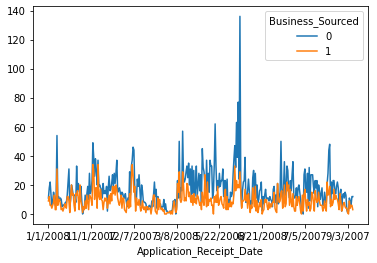

In [36]:
# Seeing Dependence of Business Sourced with Application Reciept Date
plt.figure(figsize=(20,10))
plot1 = pd.crosstab(index = train_data['Application_Receipt_Date'], columns = train_data['Business_Sourced'])
plot1.plot.line();

<Figure size 3600x3600 with 0 Axes>

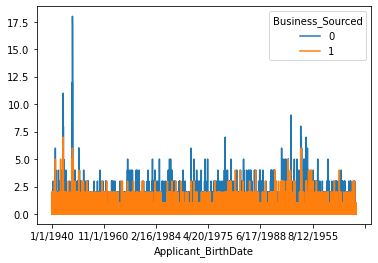

In [37]:
# Seeing Dependence of Business Sourced with Applicant Birthdate
plt.figure(figsize=(50,50))
plot1 = pd.crosstab(index = train_data['Applicant_BirthDate'], columns = train_data['Business_Sourced'])
plot1.plot.line();

<Figure size 1440x720 with 0 Axes>

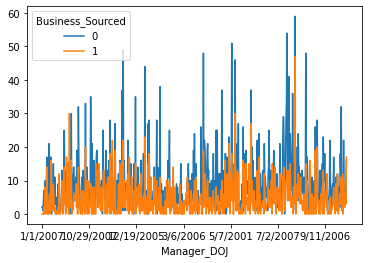

In [38]:
# Seeing Dependence of Business Sourced with Manager's Date of Joining
plt.figure(figsize=(20,10))
plot1 = pd.crosstab(index = train_data['Manager_DOJ'], columns = train_data['Business_Sourced'])
plot1.plot.line();

<Figure size 1440x720 with 0 Axes>

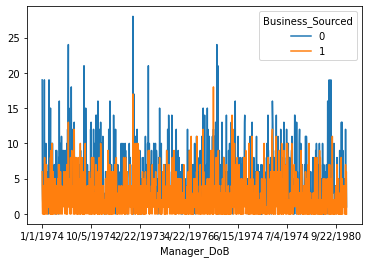

In [40]:
# Seeing Dependence of Business Sourced with Manager Date of Birth
plt.figure(figsize=(20,10))
plot1 = pd.crosstab(index = train_data['Manager_DoB'], columns = train_data['Business_Sourced'])
plot1.plot.line();

In [43]:
def age_from_date(date):
    year = date.split('/')[-1]
    month = date.split('/')[0]
    birth = int(year) + float(month)/12
    ref = 2009
    age = ref - birth
    return age

In [96]:
x = train_data['Application_Receipt_Date']
x[1]

'4/16/2007'

In [97]:
x = train_data['Applicant_BirthDate']
x[1]

'2/17/1983'

In [100]:
dict_date = {}
dataset = [train_data, test_data]
columns = ['Application_Receipt_Date', 'Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB']
for data in dataset:
    for column in columns:
        data[column] = data[column].fillna(0)
        for date in data[column]:
            if date!=0:
                dict_date[date] = age_from_date(date)
        data.replace({column: dict_date}, inplace = True)

In [102]:
train_data['Application_Receipt_Date'].value_counts()

1.583333    1077
1.083333     912
1.000000     845
0.583333     829
1.333333     723
0.500000     717
1.416667     697
1.666667     580
1.166667     567
0.916667     530
1.250000     522
1.500000     471
0.666667     434
0.833333     418
0.750000     187
0.416667      18
Name: Application_Receipt_Date, dtype: int64

In [103]:
test_data['Application_Receipt_Date'].value_counts()

 0.416667    1380
 0.000000     895
 0.333333     862
 0.250000     733
 0.166667     547
 0.083333     529
-0.083333      99
Name: Application_Receipt_Date, dtype: int64

In [111]:
train_data['Applicant_BirthDate'] = train_data['Applicant_BirthDate'].replace(0, None)
test_data['Applicant_BirthDate'] = test_data['Applicant_BirthDate'].replace(0, None)

In [110]:
train_data['Applicant_BirthDate'].value_counts()

28.416667    79
26.416667    74
27.416667    71
29.916667    70
25.916667    68
             ..
64.500000     1
72.250000     1
65.333333     1
69.916667     1
68.750000     1
Name: Applicant_BirthDate, Length: 620, dtype: int64

In [112]:
train_data['Manager_DOJ'] = train_data['Manager_DOJ'].replace(0, None)
test_data['Manager_DOJ'] = test_data['Manager_DOJ'].replace(0, None)

In [113]:
train_data['Manager_DoB'] = train_data['Manager_DoB'].replace(0, None)
test_data['Manager_DoB'] = test_data['Manager_DoB'].replace(0, None)

In [114]:
random_gen('Manager_DoB')
random_gen('Manager_DOJ')
random_gen('Applicant_BirthDate')

In [115]:
train_data.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             97
Applicant_Gender                0
Applicant_BirthDate             0
Applicant_Marital_Status        0
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation     0
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
Business_Sourced                0
dtype: int64

In [116]:
test_data.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             34
Applicant_Gender                0
Applicant_BirthDate             0
Applicant_Marital_Status       30
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation     0
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
dtype: int64

In [117]:
train_data.info

<bound method DataFrame.info of               ID  Office_PIN  Application_Receipt_Date  Applicant_City_PIN  \
0     FIN1000001      842001                  1.666667            844120.0   
1     FIN1000002      842001                  1.666667            844111.0   
2     FIN1000003      800001                  1.666667            844101.0   
3     FIN1000004      814112                  1.666667            814112.0   
4     FIN1000005      814112                  1.666667            815351.0   
...          ...         ...                       ...                 ...   
9522  FIN1009523      160017                  0.416667            160032.0   
9523  FIN1009524      848101                  0.416667            848302.0   
9524  FIN1009525      753012                  0.416667            753014.0   
9525  FIN1009526      575003                  0.416667            571248.0   
9526  FIN1009527      411006                  0.416667            411006.0   

      Applicant_Gender  Applica

In [118]:
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

In [119]:
# Getting Features
features = ['Manager_Num_Products2','Manager_Num_Products','Manager_Business','Manager_Business2','Manager_Num_Coded', 'Manager_Num_Application','Manager_Grade','Manager_Status','Manager_Current_Designation','Applicant_Occupation',
           'Application_Receipt_Date', 'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status', 'Applicant_Qualification',
           'Manager_DOJ', 'Manager_Joining_Designation', 'Manager_Gender', 'Manager_DoB']
x = pd.get_dummies(train_data[features])

# Predicting value
y = train_data['Business_Sourced']
y.shape, x.shape

((9527,), (9527, 22))

In [120]:
xtest = pd.get_dummies(test_data[features])
xtest

,Manager_Num_Products2,Manager_Num_Products,Manager_Business,Manager_Business2,Manager_Num_Coded,Manager_Num_Application,Manager_Grade,Manager_Status,Manager_Current_Designation,Applicant_Occupation,...,Applicant_BirthDate,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Gender,Manager_DoB,Applicant_Marital_Status_D,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W
0,28,28,335249,335249,1,2,3,1.0,1.0,5.0,...,37,2.0,3,1.0,0.0,30,0,0,1,0
1,28,28,335249,335249,1,2,3,1.0,1.0,5.0,...,25,2.0,3,1.0,1.0,30,0,1,0,0
2,24,24,357184,357184,0,0,2,-1.0,0.0,0.0,...,42,2.0,2,0.0,-1.0,39,0,0,1,0
3,22,22,318356,318356,0,0,4,-1.0,0.0,5.0,...,20,2.0,5,0.0,-1.0,30,0,0,1,0
4,17,17,230402,230402,1,2,2,0.0,2.0,0.0,...,23,5.0,2,2.0,1.0,37,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,9,9,175273,175273,1,1,4,1.0,2.0,3.0,...,36,2.0,4,2.0,1.0,41,0,1,0,0
5041,10,10,225710,225710,0,1,3,1.0,2.0,3.0,...,37,2.0,2,2.0,1.0,29,0,1,0,0
5042,0,0,0,0,0,3,3,1.0,2.0,4.0,...,28,1.0,1,2.0,1.0,32,0,1,0,0
5043,8,8,177204,177204,1,1,2,1.0,2.0,0.0,...,30,2.0,2,2.0,1.0,41,0,1,0,0


In [121]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x, y)
Y_pred = logreg.predict(xtest)
acc_log = round(logreg.score(x, y) * 100, 2)
acc_log

65.69

In [123]:
# Support Vector Machines

svc = SVC()
svc.fit(x, y)
Y_pred = svc.predict(xtest)
acc_svc = round(svc.score(x, y) * 100, 2)
acc_svc

65.78

In [124]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x, y)
Y_pred = knn.predict(xtest)
acc_knn = round(knn.score(x, y) * 100, 2)
acc_knn

78.83

In [125]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x, y)
Y_pred = gaussian.predict(xtest)
acc_gaussian = round(gaussian.score(x, y) * 100, 2)
acc_gaussian

64.79

In [126]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x, y)
Y_pred = perceptron.predict(xtest)
acc_perceptron = round(perceptron.score(x, y) * 100, 2)
acc_perceptron

58.78

In [127]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x, y)
Y_pred = linear_svc.predict(xtest)
acc_linear_svc = round(linear_svc.score(x, y) * 100, 2)
acc_linear_svc

65.72

In [128]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x, y)
Y_pred = sgd.predict(xtest)
acc_sgd = round(sgd.score(x, y) * 100, 2)
acc_sgd

65.46

In [129]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x, y)
Y_pred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(x, y) * 100, 2)
acc_decision_tree

99.85

In [130]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x, y)
Y_pred = random_forest.predict(xtest)
random_forest.score(x, y)
acc_random_forest = round(random_forest.score(x, y) * 100, 2)
acc_random_forest

99.85

In [131]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
3,Random Forest,99.85
8,Decision Tree,99.85
1,KNN,78.83
0,Support Vector Machines,65.78
7,Linear SVC,65.72
2,Logistic Regression,65.69
6,Stochastic Gradient Decent,65.46
4,Naive Bayes,64.79
5,Perceptron,58.78


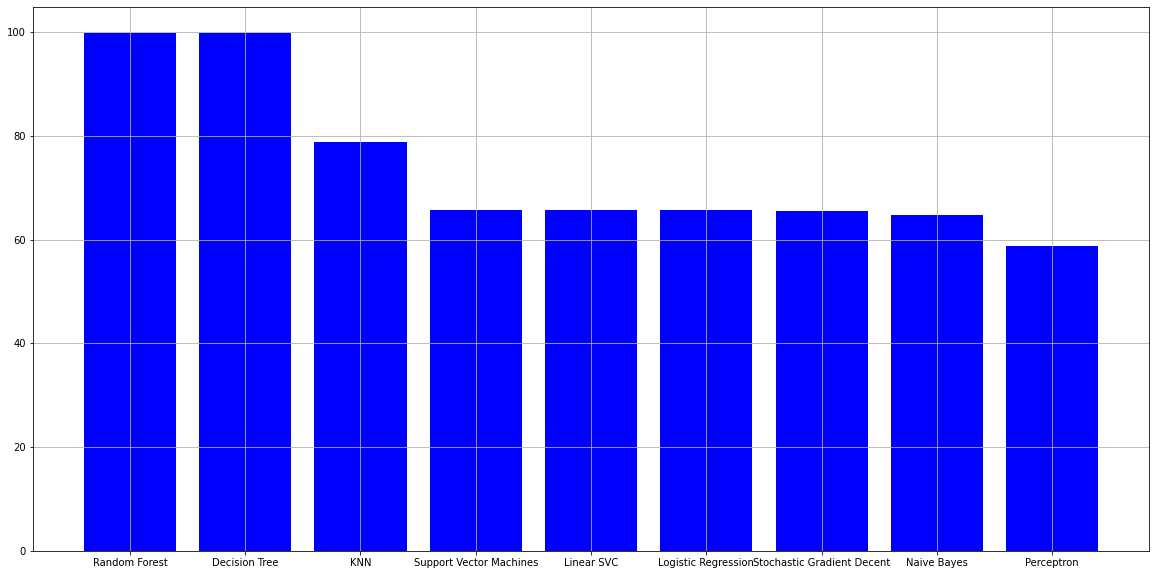

In [132]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'],color='blue')
plt.grid()
plt.show()

In [135]:
output = pd.DataFrame({'ID': test_data.ID, 'Business_Sourced': Y_pred.astype(int)})
output.to_csv('submission6.csv', index=False)

In [136]:
output.head(100)

,ID,Business_Sourced
0,FIN1009528,0
1,FIN1009529,0
2,FIN1009530,0
3,FIN1009531,0
4,FIN1009532,0
...,...,...
95,FIN1009623,0
96,FIN1009624,0
97,FIN1009625,0
98,FIN1009626,0
